In [1]:
import os
import time
import re
import pandas as pd
import nltk
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
sns.set()
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import sys
import tweepy
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg import SparseVector
from pyspark.mllib.regression import LabeledPoint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from numpy import array
from math import sqrt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from pyspark.mllib.linalg import Matrix, Matrices
from sklearn.manifold import MDS
init_notebook_mode(connected=True) #do not miss this line
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.probability import ConditionalFreqDist 
from textblob import TextBlob

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning:

detected Windows; aliasing chunkize to chunkize_serial

C:\ProgramData\Anaconda3\lib\site-packages\py4j\java_collections.py:13: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working

C:\ProgramData\Anaconda3\lib\site-packages\py4j\java_collections.py:13: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working

C:\ProgramData\Anaconda3\lib\site-packages\py4j\java_collections.py:13: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working

C:\ProgramData\Anaconda3\lib\site-packages\py4j\java_collections.py:13: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8

In [2]:
analyser = SentimentIntensityAnalyzer()
translator = Translator()

In [3]:
def sentiment_analyzer_scores(text, engl=True):
    if engl:
        trans = text
    else:
        trans = TextBlob(text)
        trans = trans.translate(to='en')
        trans = trans.string

    score = analyser.polarity_scores(trans)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1
    
def translate_gan(text):
    terj = []
    for i in text:
        try:
            trans = TextBlob(i)
            trans = trans.translate(to='en')
            trans = trans.string
        except:
            trans = i
        terj.append(trans)
    return terj

def list_tweets(user_id, count, prt=False):
    tweets = api.user_timeline(
        "@" + user_id, count=count, tweet_mode='extended')
    tw = []
    for t in tweets:
        tw.append(t.full_text)
        if prt:
            print(t.full_text)
            print()
    return tw

def kecil(datas):
    a = []
    for i in datas:
        i = i.lower()
        a.append(i)
    return a

def ubah_hur(jkj):
    end = []
    dari = ["tdk","gak","ngga","ga","yg","emng","mmng","knp","stlh","gara2","krn","hrs","msh","bkn","yaa","trs","sdh","untk","dgn","mksd","gk","y","thn","jd","skrg","sampe","bapakk",'dlm','cuuuy',"yg ", 'tak','kalo','sekrng','kek','gue','sya'] 
    hasil = ["tidak","tidak","tidak","tidak","yang", "memang","memang","kenapa","setelah","karena","karena","harus","masih","bukan","ya","terus","sudah","untuk","dengan","maksud","tidak","ya","tahun","jadi","sekarang","sampai","bapak",'dalam','', "yang ",'tidak','kalau','sekarang','seperti','kamu','saya']
    for lst in jkj:
        lst = word_tokenize(lst)
        hasl = []
        for i in lst:
            if i in dari:
                index = dari.index(i)
                i = hasil[index]
                hasl.append(i)
            else:
                hasl.append(i)
        fullStr = ' '.join(hasl)
        end.append(fullStr)
        fullStr = ''
    return(end)
    
    

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
        input_txt = input_txt.strip()
    return input_txt

def clean_tweets(lst):
    #remvoe twitter pattern RT ex:(RT xxx)
    lst = np.vectorize(remove_pattern) (lst, "RT @[\w]*:")
    lst = np.vectorize(remove_pattern) (lst, "rt @[\w]*:")
    #remove twitter handles ex:(@name)
    lst = np.vectorize(remove_pattern) (lst, "@[\w]*")
    #remove url
    lst = np.vectorize(remove_pattern) (lst, "https?://[A-Za-z0-9./]*")
    #remove spesial character
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]"," ")
    lst = np.vectorize(remove_pattern) (lst, "\n|\r|&gt")
    return lst

def anl_tweets(lst, title='Tweets Sentiment', engl=True ):
    sents = []
    ino = 0
    for tw in lst:
        print("proses ke-",ino)
        ino = ino + 1
        try:
            st = sentiment_analyzer_scores(tw, engl)
            sents.append(st)
        except:
            sents.append(0)
    return sents

def word_cloud(wd_list):
    stopwords = set(list(STOPWORDS) +["dan","di","gk","maksud","butuh","memang","kenapa","meski","foto2","tidakntengnya","tandatantidakni","jantidakni","tidakra2","di","ga","pak",",",".","?","ini","yang","#","dan","!","yg",":","kami","saya","lagi","...","masa","kenapa","harus","setelah","setelah","gara2","emng","karena","...","kalian","masih","minta","gak","ada","dari","itu","oleh","(","terus","tidak","sudah","untuk",";","dgn","&","amp","ke","yg","gpp","tk",',',  '.',  'yang',  'tidak',  '?',  '#',  'dan',  'di',  '...',  ':',  'ini',  'itu',  'ada',  '!',  '``',  'dengan',  "'",  "'",  "''",  'saya',  'jadi',  'dari',  'apa',  'kalau',  'dalam',  'kita',  'ya',  '...',  'untuk',  ';','&','yang'])  
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

import csv
def twitter_stream_listener(file_name,
                            filter_track,
                            follow=None,
                            locations=None,
                            languages=None,
                            time_limit=20):
    class CustomStreamListener(tweepy.StreamListener):
        def __init__(self, time_limit):
            self.start_time = time.time()
            self.limit = time_limit
            # self.saveFile = open('abcd.json', 'a')
            super(CustomStreamListener, self).__init__()
        def on_status(self, status):
            if (time.time() - self.start_time) < self.limit:
                print(".", end="")
                # Writing status data
                with open(file_name, 'a', encoding="utf-8") as f:
                    writer = csv.writer(f)
                    writer.writerow([
                        status.author.screen_name, status.created_at,
                        status.text
                    ])
            else:
                print("\n\n[INFO] Closing file and ending streaming")
                return False
        def on_error(self, status_code):
            if status_code == 420:
                print('Encountered error code 420. Disconnecting the stream')
                # returning False in on_data disconnects the stream
                return False
            else:
                print('Encountered error with status code: {}'.format(
                    status_code))
                return True  # Don't kill the stream
        def on_timeout(self):
            print('Timeout...')
            return True  # Don't kill the stream
    # Writing csv titles
    print(
        '\n[INFO] Open file: [{}] and starting {} seconds of streaming for {}\n'
        .format(file_name, time_limit, filter_track))
    with open(file_name, 'w' ,encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(['author', 'date', 'text'])
    streamingAPI = tweepy.streaming.Stream(
        auth, CustomStreamListener(time_limit=time_limit))
    streamingAPI.filter(
        track=filter_track,
        follow=follow,
        locations=locations,
        languages=languages,
    )
    f.close()
    
def tokenize_gan(datas):
    tk = ConditionalFreqDist()
    for word in word_tokenize(datas):
        condition = len(word) 
        tk[condition][word] += 1
    print(tk)
    return list(tk)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def bersiin(data):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    a = []
    for i in data:
        i = stemmer.stem(i)
        a.append(i)
        print(len(a))
    return a

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

def hapus(lst):
 
    stop_factory = StopWordRemoverFactory().get_stop_words()
    more_stopword = ["dan","di","gk","maksud","butuh","memang","kenapa","meski","foto2","tidakntengnya","tandatantidakni","jantidakni","tidakra2","di","ga","pak",",",".","?","ini","yang","#","dan","!","yg",":","kami","saya","lagi","...","masa","kenapa","harus","setelah","setelah","gara2","emng","karena","...","kalian","masih","minta","gak","ada","dari","itu","oleh","(","terus","tidak","sudah","untuk",";","dgn","&","amp","ke","yg","gpp","tk",',',  '.',  'yang',  'tidak',  '?',  '#',  'dan',  'di',  '...',  ':',  'ini',  'itu',  'ada',  '!',  '``',  'dengan',  "'",  "'",  "''",  'saya',  'jadi',  'dari',  'apa',  'kalau',  'dalam',  'kita',  'ya',  '...',  'untuk',  ';','&','yang']

    data = stop_factory + more_stopword
    
    print(data)

    dictionary = ArrayDictionary(data)
    stro = StopWordRemover(dictionary)

    daftar = []
        
    for i in lst:
        a = stro.remove(i)
        daftar.append(a)
    return daftar

def ubah_sent(text):
    kl = []
    for i in text:
        if i == -1:
            i = "Negative"
        elif i == 0:
            i ="Neutral"
        elif i == 1:
            i = "Positive"
        kl.append(i)
    return kl

In [4]:
consumer_key = "SuQcDFeXbQkQgtPhEQPEFJeDJ"
consumer_secret = "nPO9cIwaxdQZhWxZbuslUtMiZnwP1mfxuQn4hqDOxhz6xbeCMC"
access_token = "360823499-dJNRz9fSWNTLS7KHre0mN85bkUkONQ7mK1yYb5K1"
access_token_secret = "0IMf0YswNKGEsnZsY65PRXuMkrAj09ReckrIbTtyahw2K"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [43]:
import time
# filter_track = ['jokowi','Jokowi',"kabinet","Kabinet","Menteri","menteri","pelantikan","Pelantikan","undang-undang","UU","uu","UUD","uud","kebijakan","peraturan","presiden","Presiden","ekonomi","Ekonomi","pendidikan","Pendidikan","Kesehatan","kesehatan","Keamanan","keamanan","Pemerintah","pemerintah","birokrasi","Birokrasi","Birokrat","birokrat","masyarakat","Masyarakat"]
filter_track = ['indonesia','jelek',"#indonesia"]
file_name = 'test.csv'
twitter_stream_listener (file_name, filter_track, time_limit=10)


[INFO] Open file: [test.csv] and starting 10 seconds of streaming for ['indonesia', 'jelek', '#indonesia']

...............

[INFO] Closing file and ending streaming


In [23]:
df_tws = pd.read_csv(file_name)
print("Ukuran Data :" ,df_tws.shape)
df_tws.head()

Ukuran Data : (18, 3)


,author,date,text
0,anakabdkarim,2019-11-18 10:20:42,Aduhh die main ke esok..
1,bobletie,2019-11-18 10:20:43,RT @SMTOWN_Idn: AweSM Corner: NCT 127 Nyobain ...
2,miIetorrico,2019-11-18 10:20:43,RT @LuPiastrellini: mi mili interior necesita ...
3,Gate_15_Analyst,2019-11-18 10:20:44,Indonesia police link suicide bombing to Islam...
4,anjarhanif11,2019-11-18 10:20:44,RT @useletterspls: Iyasih lo ga vulgar. \r\n\r...


In [24]:
#DATA CLEANING
df_tws['clean'] = df_tws['text'].str.strip()
# df_tws['clean'] = hapus(df_tws['clean'])
# df_tws['clean'] = bersiin(df_tws['clean'])
df_tws['clean'] =  clean_tweets(df_tws['clean'])
df_tws['clean'] = kecil(df_tws['clean'])
df_tws['clean'] = ubah_hur(df_tws['clean'])

In [25]:
#Analyse with vader
df_tws['sent'] = anl_tweets(df_tws['clean'],title="Sentimen Twitter",engl=False)

proses ke- 0
proses ke- 1
proses ke- 2
proses ke- 3
proses ke- 4
proses ke- 5
proses ke- 6
proses ke- 7
proses ke- 8
proses ke- 9
proses ke- 10
proses ke- 11
proses ke- 12
proses ke- 13
proses ke- 14
proses ke- 15
proses ke- 16
proses ke- 17


In [26]:
df_tws

,author,date,text,clean,sent
0,anakabdkarim,2019-11-18 10:20:42,Aduhh die main ke esok..,aduhh die main ke esok..,-1
1,bobletie,2019-11-18 10:20:43,RT @SMTOWN_Idn: AweSM Corner: NCT 127 Nyobain ...,awesm corner : nct 127 nyobain hal-hal yang in...,0
2,miIetorrico,2019-11-18 10:20:43,RT @LuPiastrellini: mi mili interior necesita ...,mi mili interior necesita estar tomando sol ac...,-1
3,Gate_15_Analyst,2019-11-18 10:20:44,Indonesia police link suicide bombing to Islam...,indonesia police link suicide bombing to islam...,0
4,anjarhanif11,2019-11-18 10:20:44,RT @useletterspls: Iyasih lo ga vulgar. \r\n\r...,iyasih lo tidak vulgar . tp klo udh ngomong gi...,1
5,puterinurhuda,2019-11-18 10:20:45,RT @SyedSaddiq: Jumpa esok!\r\nSorak kuat kuat...,"jumpa esok ! sorak kuat kuat , kutip sampah , ...",1
6,sugito43334255,2019-11-18 10:20:45,"RT @geloraco: Indonesia Perlu Kedamaian, MUI M...","indonesia perlu kedamaian , mui minta sukmawat...",1
7,jxnghyunn,2019-11-18 10:20:46,RT @minhoshineeina: COMING SOON ~ ✨Kissing The...,coming soon ~ ✨kissing the moon ❄️ shawol indo...,0
8,amiraaafandi,2019-11-18 10:20:49,RT @SyedSaddiq: Jumpa esok!\r\nSorak kuat kuat...,"jumpa esok ! sorak kuat kuat , kutip sampah , ...",1
9,elechum337,2019-11-18 10:20:49,RT @TheBlueHouseENG: &lt;D-7&gt; 2019 ASEAN–RO...,& lt ; d-7 ; 2019 asean–rok commemorative summ...,0


In [27]:
#change datetime format
#change format time
df_tws = df_tws.assign(date=pd.to_datetime(df_tws.date))

print("Number of tweets: ",len(df_tws['text']))
df_tws.head(5)

Number of tweets:  18


,author,date,text,clean,sent
0,anakabdkarim,2019-11-18 10:20:42,Aduhh die main ke esok..,aduhh die main ke esok..,-1
1,bobletie,2019-11-18 10:20:43,RT @SMTOWN_Idn: AweSM Corner: NCT 127 Nyobain ...,awesm corner : nct 127 nyobain hal-hal yang in...,0
2,miIetorrico,2019-11-18 10:20:43,RT @LuPiastrellini: mi mili interior necesita ...,mi mili interior necesita estar tomando sol ac...,-1
3,Gate_15_Analyst,2019-11-18 10:20:44,Indonesia police link suicide bombing to Islam...,indonesia police link suicide bombing to islam...,0
4,anjarhanif11,2019-11-18 10:20:44,RT @useletterspls: Iyasih lo ga vulgar. \r\n\r...,iyasih lo tidak vulgar . tp klo udh ngomong gi...,1


In [28]:
df_tws['terjemahan'] = translate_gan(df_tws['clean'])

In [29]:
clean = list(set(df_tws["clean"]))
print("panjang data bersih = ",len(clean))

panjang data bersih =  16


In [30]:
#create new clean data
transl = pd.DataFrame(data={"trans": clean[1:]})
# transl.to_csv("./file.csv", sep=',',index=False)
transl["terjemahan"] = translate_gan(transl['trans'])
transl['sentimen bersih'] = anl_tweets(transl['trans'],title="Hasil Sentimen",engl=False)
transl.head()

proses ke- 0
proses ke- 1
proses ke- 2
proses ke- 3
proses ke- 4
proses ke- 5
proses ke- 6
proses ke- 7
proses ke- 8
proses ke- 9
proses ke- 10
proses ke- 11
proses ke- 12
proses ke- 13
proses ke- 14


,trans,terjemahan,sentimen bersih
0,"indonesia perlu kedamaian , mui minta sukmawat...","Indonesia needs peace, Mui asks for clarificat...",1
1,come on persita dan persik kediri kangen kalia...,come on persita and peach kediri miss you in t...,-1
2,aduhh die main ke esok..,Aduhh die play tomorrow ..,-1
3,indonesia anjing,Indonesian dog,0
4,indonesia police link suicide bombing to islam...,indonesia police link suicide bombing to islam...,0


In [31]:
#Visual Analysis
#ubah sent to word
df_tws["hasil Sentiment"] = ubah_sent(df_tws['sent'])

In [32]:
import operator
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

thh =' '.join(df_tws["hasil Sentiment"])
bhh = word_count(thh)

In [33]:
df_tws['wl'] = hapus(df_tws['clean'])
df_tws['wl'] = bersiin(df_tws['wl'])

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

Semua kata


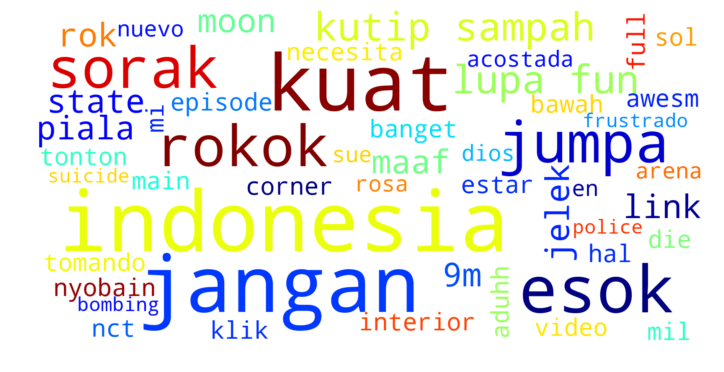

In [34]:
word_cloud(df_tws.wl)
print("Semua kata")

Positive Tweets


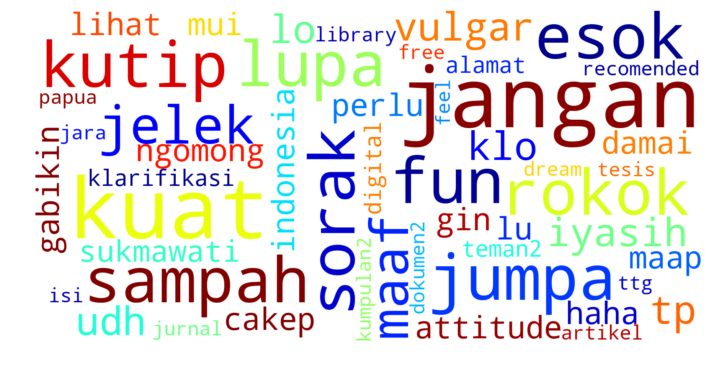

In [35]:
# Words in positive tweets
print("Positive Tweets")
tws_pos = df_tws['wl'][df_tws["sent"] == 1]
word_cloud(tws_pos)

Negative Tweets


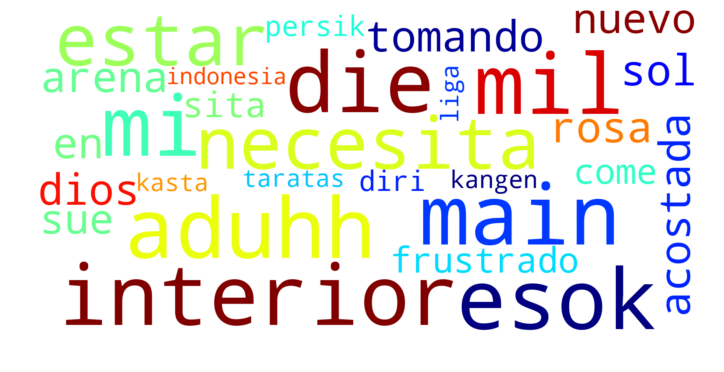

In [36]:
# Words in negative tweets
print("Negative Tweets")
tws_pos = df_tws['wl'][df_tws['sent'] == -1]
word_cloud(tws_pos)

Neutral Tweets


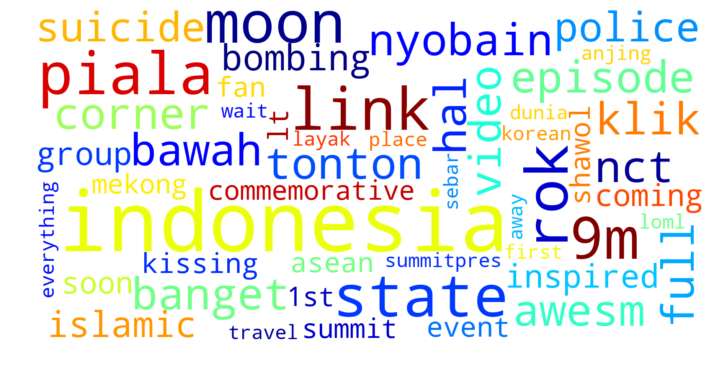

In [37]:
# Words in negative tweets
print("Neutral Tweets")
tws_pos = df_tws['wl'][df_tws['sent'] == 0]
word_cloud(tws_pos)

In [38]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from positive tweets

HT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(df_tws['text'][df_tws['sent'] == -1])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])


# Positive Tweets
print("Positive Hastag")
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


Positive Hastag


ValueError: min() arg is an empty sequence

<Figure size 1152x360 with 0 Axes>

In [39]:
# Negative Tweets
print("Negative Hastag")
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Negative Hastag


ValueError: min() arg is an empty sequence

<Figure size 1152x360 with 0 Axes>

In [40]:
print("Hasil sentimen adalah :")
jhh = sorted(bhh.items(), key=operator.itemgetter(0),reverse=False)
jhh

Hasil sentimen adalah :


[('Negative', 3), ('Neutral', 8), ('Positive', 7)]

<BarContainer object of 3 artists>

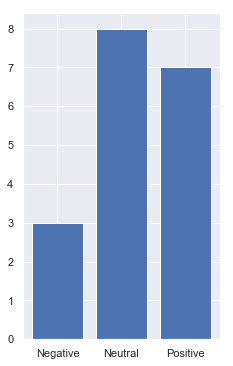

In [41]:
sentimen = []
jumlah = []

for i,k in jhh:
  sentimen.append(i)
  jumlah.append(k)


plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.bar(sentimen, jumlah)

In [42]:
df_tws

,author,date,text,clean,sent,terjemahan,hasil Sentiment,wl
0,anakabdkarim,2019-11-18 10:20:42,Aduhh die main ke esok..,aduhh die main ke esok..,-1,Aduhh die play tomorrow ..,Negative,aduhh die main esok
1,bobletie,2019-11-18 10:20:43,RT @SMTOWN_Idn: AweSM Corner: NCT 127 Nyobain ...,awesm corner : nct 127 nyobain hal-hal yang in...,0,awesm corner: nct 127 try things that are real...,Neutral,awesm corner nct 127 nyobain hal indonesia ban...
2,miIetorrico,2019-11-18 10:20:43,RT @LuPiastrellini: mi mili interior necesita ...,mi mili interior necesita estar tomando sol ac...,-1,my inner mili needs to be sunbathing lying on ...,Negative,mi mil interior necesita estar tomando sol aco...
3,Gate_15_Analyst,2019-11-18 10:20:44,Indonesia police link suicide bombing to Islam...,indonesia police link suicide bombing to islam...,0,indonesia police link suicide bombing to islam...,Neutral,indonesia police link suicide bombing to islam...
4,anjarhanif11,2019-11-18 10:20:44,RT @useletterspls: Iyasih lo ga vulgar. \r\n\r...,iyasih lo tidak vulgar . tp klo udh ngomong gi...,1,thank you you are not vulgar. but if you say t...,Positive,iyasih lo vulgar tp klo udh ngomong gin gabiki...
5,puterinurhuda,2019-11-18 10:20:45,RT @SyedSaddiq: Jumpa esok!\r\nSorak kuat kuat...,"jumpa esok ! sorak kuat kuat , kutip sampah , ...",1,"see you tomorrow ! strong cheers, pick up tras...",Positive,jumpa esok sorak kuat kuat kutip sampah jangan...
6,sugito43334255,2019-11-18 10:20:45,"RT @geloraco: Indonesia Perlu Kedamaian, MUI M...","indonesia perlu kedamaian , mui minta sukmawat...",1,"Indonesia needs peace, Mui asks for clarificat...",Positive,indonesia perlu damai mui sukmawati klarifikas...
7,jxnghyunn,2019-11-18 10:20:46,RT @minhoshineeina: COMING SOON ~ ✨Kissing The...,coming soon ~ ✨kissing the moon ❄️ shawol indo...,0,coming soon ~ ✨kissing the moon ❄️ shawol indo...,Neutral,coming soon kissing the moon shawol indonesia ...
8,amiraaafandi,2019-11-18 10:20:49,RT @SyedSaddiq: Jumpa esok!\r\nSorak kuat kuat...,"jumpa esok ! sorak kuat kuat , kutip sampah , ...",1,"see you tomorrow ! strong cheers, pick up tras...",Positive,jumpa esok sorak kuat kuat kutip sampah jangan...
9,elechum337,2019-11-18 10:20:49,RT @TheBlueHouseENG: &lt;D-7&gt; 2019 ASEAN–RO...,& lt ; d-7 ; 2019 asean–rok commemorative summ...,0,& lt ; d-7 ; 2019 asean–rok commemorative summ...,Neutral,lt d-7 2019 asean rok commemorative summit the...
